Gonzalo Cardenal Antolín

# Tarea 4.1 
# Modelo de predación de Lotka y Volterra con presa con crecimiento logístico

Dibujar las las soluciones y estudiar la estabildad del modelo predación de Lotka y Volterra con presa con crecimiento logístico.

Este modelo está formado por dos edo's no lineales que constituyen un modelo simplificado de la interacción de dos poblaciones una de las cuales es un predador y la otra una presa, por ejemplo zorros y conejos. Las variables $x$ e $y$ representan respectivamnete, el número de individuos de la población de conejos y de zorros, respectivamente, que depende del tiempo $t$. Estas son las ecuaciones


\begin{align}
 \frac{dx}{dt} &= ax-bx^2-cxy\\
 \frac{dy}{dt} &= -dy+exy
\end{align}


Aquí las constantes $a$, $b,$ $c,$ $d$ y $e$ son parámetros reales positivos. En este caso $x$ es la presa que crece según un modelo logístico en ausencia de predar $y.$ Este a su vez se extingue en ausencia de la presa. 

Estas ecuacines se pueden también se pueden escribrir como

\begin{align}
 \frac{dx}{dt} &= ax\left(1-\frac{x}{k}\right)-cxy\\
 \frac{dy}{dt} &= -dy+exy
\end{align}

Con $k=a/b$

Seguir el siguiente esquema

1. Solución numérica del PVI (para valores concretos de los parámetros)
2. Gráficas de poblaciones como funciones del tiempo y de órbitas (para valores concretos de los parámetros)
3. Representar campo de direcciones y óbitas: plano de fases (para valores concretos de los parámetros)
4. Representar puntos de equilibrio en el plano de fases (para valores concretos de los parámetros)
5. Estabilidad de los punto de equilibrio del sistema: estudio cualitativo del caso general (valores arbitrarios de los parámetros del sistema)

In [1]:
import sympy as sp
import numpy as np
import scipy.integrate as scint
import matplotlib.pyplot as plt
sp.init_printing()

### 1.Solución PVI (Problema de los valores iniciales)

La función que define el sistema es:
$$
F(x,y,t) = (ax (1 - \frac{x}{k}) - cxy,-dy + exy)
$$

In [2]:
# Introducimos los valores de las constantes
a, b, c, d, e = 1.3, 0.8, 1.1, 1.15, 1
k = a/b
# La función 'F' del sistema y el vector 'P' que se compone de las funciones desconocidas 'x(t)', 'y(t)'
def F(P, t):
    return [a*P[0]*(1-P[0]/k)-c*P[0]*P[1],-d*P[1]+e*P[0]*P[1]]

# Damos cien valores a la variable independiente 't' entre 0 y 12 
tiempo = np.linspace(0, 12, 100)

# Condición inicial
P0 = [1.5, 1.0]

# Obtenemos la resolución numérica del sistema en forma de matriz 
# La matriz de la solución se asigna a la variable Ps
# Esta matriz tiene una con una columna para los valores de cada población. 
Ps = scint.odeint(F, P0, tiempo)

# Valores obtenidos de la población de conejos en la primera columna 
presa = Ps[:,0]

# Valores obtenidos de la población de zorros en la segunda
predador = Ps[:,1]

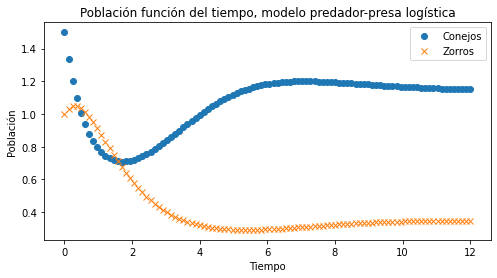

In [3]:
# Tamaño de la figura cuadrada
plt.figure(figsize = (8,4))

# Representamos el número de conejos como función del tiempo
plt.plot(tiempo, presa, "o", label = "Conejos")

# Representamos el número de zorros como función del tiempo
plt.plot(tiempo, predador, "x", label = "Zorros")

# Ponemos etiquetas a los ejes
plt.xlabel("Tiempo")
plt.ylabel("Población")

# Ponemos título a la ilustración
plt.title("Población función del tiempo, modelo predador-presa logística") 

# Ponemos la leyenda
plt.legend()

# Mostarmos la figura
plt.show()

En esta gráfica según las condiciones iniciales que hemos asignado, podemos observar claramente que casi la completa ausencia de zorros lleva a un crecimiento logístico por parte de los conejos (presas)

### 2.Gráficas de poblaciones como funciones del tiempo y órbitas

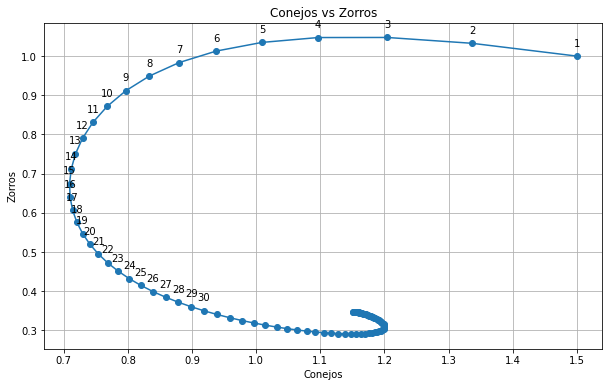

In [4]:
# Representamos los puntos correspondientes al número de conejos y zorros en cada instante de tiempo
plt.figure(figsize = (10,6))
plt.plot(presa, predador, '-o' )
puntos=1
for x,y in zip(presa[:30],  predador[:30]):
    
        label = puntos
        puntos += 1
        
        plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.grid(True)
# Ponemos etiquetas a los ejes
plt.xlabel("Conejos")
plt.ylabel("Zorros")

# Ponemos título a la figura
plt.title("Conejos vs Zorros")

# Mostramos la figuar
plt.show()

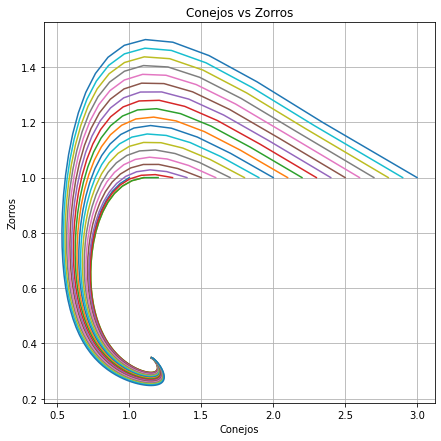

In [5]:
# Queremos que la figura sea cuadrada
plt.figure(figsize = (7,7))

# Elegimos condiciones iniciales para el número de conejos como una lista de 21 valores entre 1 y 3 ambos incluidos
ic = np.linspace(1.0, 3.0, 21)

# Iteramos los siguientes pasos para cada valor de ic:
# 1. Elegimos una condición inicial, como valor de (ic, 1)
# 2. Calculamos la correspondiente solución del sistema
# 3. Representamos la solución particular obtenida
for r in ic:
    P0 = [r, 1.0]
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
    
# Ponemos nombres a los ejes
plt.xlabel("Conejos")
plt.ylabel("Zorros")
plt.grid(True)

# Ponemos título a la figura 
plt.title("Conejos vs Zorros")

# Mostramos la figura
plt.show()

Observamos que independientemente del número inicial de presas (distintas condiciones iniciales de presas) el sistema coverge asintóticamente hacia un punto de equilibrio, que no se corresponde con $k=a/b=1,625$ (capacidad de carga del modelo logístico de presas) porque sigue habiendo presencia (aunque sea pequeña) de predadores.

### 3.Campos de direcciones y órbitas: plano de fases

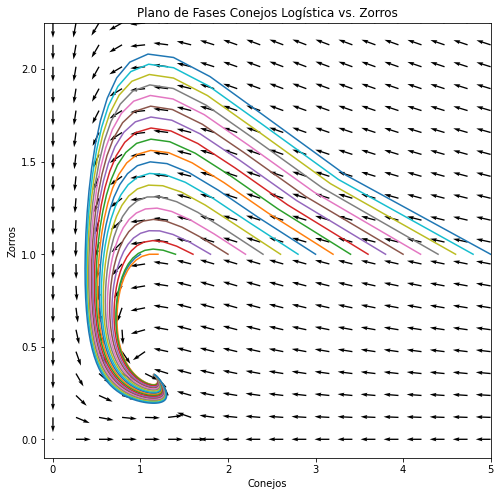

In [6]:
#Campo de direcciones, vectores unitarios. 
X, Y = np.meshgrid(np.linspace(0,5,20), np.linspace(0,2.25,20))
U = F([X,Y], tiempo)[0]
V = F([X,Y], tiempo)[1]
modulo = U**2 + V**2
D1 = np.ones([20,20])
D2 = np.ones([20,20])
for i in range(20):
    for j in range(20):
        if modulo[i,j] == 0:
            D1[i,j] = 0
            D2[i,j] = 0
        else:
            D1[i,j]=U[i,j]/np.sqrt(modulo[i,j])
            D2[i,j]=V[i,j]/np.sqrt(modulo[i,j])
plt.figure(figsize = (8,8))

#Campo de direcciones en el gráfico

plt.quiver(X, Y, D1, D2, scale = 30)

#Soluciones del sistema (plano de fases).
ic = np.linspace(1.0, 5.0, 21)
for r in ic: 
    P0 = [r,1]
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
plt.xlabel("Conejos")
plt.ylabel("Zorros")
plt.xlim(-0.1,5)
plt.ylim(-0.1,2.25)
plt.title("Plano de Fases Conejos Logística vs. Zorros")

plt.show()

### 4.Puntos de equilibrio en el plano de fases

Como observaremos posteriormente en el estudio cualitativo, el modelo cuenta con 3 puntos críticos:
- El punto crítico trivial (0,0), que conforma un punto de silla.
- El punto crítico ($k, 0$), siendo $k=a/b$. Su estabilidad corresponde con un nodo propio.
- El punto crítico ($\frac{d}{e},\frac{ae - bd}{ce}$) cuyos autovalores son dominantes y es hacia donde tiende el sistema.

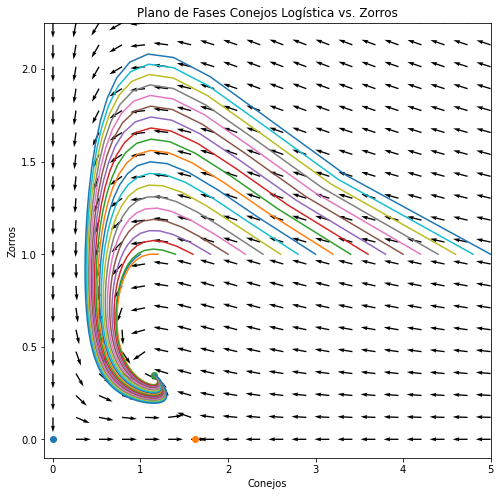

In [7]:
#Campo de direcciones, vectores unitarios. 
X, Y = np.meshgrid(np.linspace(0,5,20), np.linspace(0,2.25,20))
U = F([X,Y], tiempo)[0]
V = F([X,Y], tiempo)[1]
modulo = U**2 + V**2
D1 = np.ones([20,20])
D2 = np.ones([20,20])
for i in range(20):
    for j in range(20):
        if modulo[i,j] == 0:
            D1[i,j] = 0
            D2[i,j] = 0
        else:
            D1[i,j]=U[i,j]/np.sqrt(modulo[i,j])
            D2[i,j]=V[i,j]/np.sqrt(modulo[i,j])
plt.figure(figsize = (8,8))

#Campo de direcciones en el gráfico

plt.quiver(X, Y, D1, D2, scale = 30)

#Soluciones del sistema (plano de fases).
ic = np.linspace(1.0, 5.0, 21)
for r in ic: 
    P0 = [r,1]
    Ps = scint.odeint(F, P0, tiempo)
    plt.plot(Ps[:,0], Ps[:,1], "-")
plt.xlabel("Conejos")
plt.ylabel("Zorros")
plt.xlim(-0.1,5)
plt.ylim(-0.1,2.25)
plt.title("Plano de Fases Conejos Logística vs. Zorros")

# Representamos los puntos de equilibrio del sistema
#Estos puntos se han conocido en apartados posteriores y añadido al gráfico
plt.scatter(0,0)
plt.scatter(k, 0)
plt.scatter(d/e, (a*e - b*d)/(c*e))

plt.show()

### 5.Estabilidad de los punto de equilibrio del sistema: estudio cualitativo del caso general

Dado un sistema de edo's 

$$
\left\{
\begin{align}
 \frac{dx}{dt} &= F(x, y) \\
 \frac{dy}{dt} &= G(x, y)
\end{align}
\right.
$$

los puntos críticos son los que hacen cero ambas derivadas, es decir, las soluciones del sistema de ecuaciones

$$
\left\{
\begin{align}
 F(x, y) = 0\\
 G(x, y) = 0
\end{align}
\right.
$$

Las soluciones de equilibrio corresponden a soluciones constantes: son aquellas que verifican que en todo instante el sistema está en el punto crítico. Si $(x_e, y_e)$ es un punto crítico, una solución de equilibrio será 

$$
x(t)\equiv x_e, \qquad\qquad y(t)\equiv y_e.
$$

Procedemos a estudiar la estabilidad del modelo predador-presa de Lotka-Volterra con presa con crecimiento logístico. 

*Durante todo el análisis asumimos que todos los parámetros a,b,c,d y e son positivos ya que si no no tendrían sentido biológico. Los signos de los parámetros que indican crecimiento o decrecimiento de la población ya están asignados en el modelo.

In [8]:
#Símbolos que vamos a utilizar.
x, y = sp.symbols('x y')
a,b,c,d,e,k=sp.symbols('a b c d e k', positive=True)

#Definimos expresiones de las ecuaciones diferenciales del sistema
f = a*x - b*(x)**2 - c*x*y
g = -d*y + e*x*y
f, g

In [9]:
ptos_c = sp.solve([f,g],(x,y))
ptos_c

De las resultados obtenidos en las soluciones del sistema observamos que:
- Tenemos 3 puntos críticos (0,0),($\frac{a}{b}, 0$),($\frac{d}{e},\frac{ae - bd}{ce}$).
- El (0,0) se corresponde con el punto crítico trivial sin sentido biológico ya que implica la extinción de ambas poblaciones.
- El ($\frac{a}{b}, 0$) representa la solución de equlibrio en ausencia de predadores donde la población de presas llega a su carga máxima del sistema ($k$).
-El tercero ($\frac{d}{e},\frac{ae - bd}{ce}$) es el punto de equilibrio donde ambas poblaciones conviven tienden a un punto que se mantiene constante en el tiempo.

In [10]:
p1 =ptos_c[0]
p2 =ptos_c[1]
p3 =ptos_c[2]

Linearizamos el sistema no lineal con la matriz jacobiana, a pesar de que la configuración concreta del sistema no lineal no se va a mantener, la estabilidad sí. Por tanto:

In [11]:
C = sp.Matrix([[f.diff(x), f.diff(y)],[g.diff(x), g.diff(y)]])
C

⎡a - 2⋅b⋅x - c⋅y    -c⋅x  ⎤
⎢                         ⎥
⎣      e⋅y        -d + e⋅x⎦

#### Punto crítico trivial $(0,0)$

In [12]:
C1 = C.subs({x:p1[0], y:p1[1]})
C1

⎡a  0 ⎤
⎢     ⎥
⎣0  -d⎦

In [13]:
det_C1 = sp.simplify(sp.det(C1))
det_C1

In [14]:
tr_C1 = sp.simplify(sp.trace(C1))
tr_C1

In [27]:
A1= (tr_C1, det_C1)
A1

In [26]:
C1.eigenvects()

⎡⎛      ⎡⎡1⎤⎤⎞  ⎛       ⎡⎡0⎤⎤⎞⎤
⎢⎜a, 1, ⎢⎢ ⎥⎥⎟, ⎜-d, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣0⎦⎦⎠  ⎝       ⎣⎣1⎦⎦⎠⎦

Si reescribimos el sistema linearizado para esta solución:
$$\frac{du}{dt}= a$$ 
$$\frac{dv}{dt}= -d$$

Los autovalores son reales puros, siendo uno positivo y otro negativo. Por tanto, estamos ante un punto de silla o punto hiperbólico.

Si lo comprobamos para valores concretos en un diagrama de fases vemos el punto de silla:
   
   
$$a,b,c,d,e= 1.5,1,1.3,1.5,1.1$$ 

In [ ]:
# Introducimos los valores de las constantes
a,b,c,d,e = 1.5,1,1.3,1.5,1.1

def F0(P, t):
    return [a*P[0], - d*P[1]]

# Damos cien valores a la variable independiente 't' entre 0 y 12 
tiempo = np.linspace(0, 12, 100)

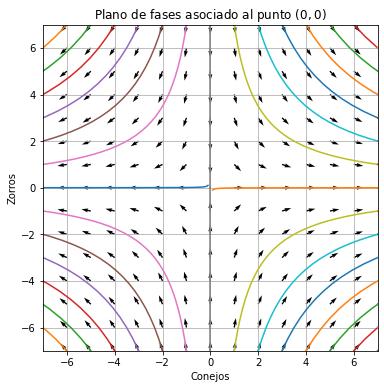

In [55]:
plt.figure(figsize=(6,6))
tiempo = np.linspace(0, 5, 100)

# Representamos varias soluciones del sistema
ic = np.linspace(-7, 7.0, 15)
for r in ic:
    X0 = [r, 7]
    Xs = scint.odeint(F0, X0, tiempo)
    plt.plot(Xs[:,0], Xs[:,1], "-")
for s in ic:
    X0 = [-7, s]
    Xs = scint.odeint(F0, X0, tiempo)
    plt.plot(Xs[:,0], Xs[:,1], "-")
for r in ic:
    X0 = [r, -7]
    Xs = scint.odeint(F0, X0, tiempo)
    plt.plot(Xs[:,0], Xs[:,1], "-")
for s in ic:
    X0 = [7, s]
    Xs = scint.odeint(F0, X0, tiempo)
    plt.plot(Xs[:,0], Xs[:,1], "-")
tempo = np.linspace(0, 20, 100)
X0 = [-.1, .1]
Xs = scint.odeint(F0, X0, tempo)
plt.plot(Xs[:,0], Xs[:,1], "-")
X0 = [.1, -.1]
Xs = scint.odeint(F0, X0, tempo)
plt.plot(Xs[:,0], Xs[:,1], "-")


pm = 15
X0, Y0 = np.meshgrid(np.linspace(-7, 7, pm),  np.linspace(-7, 7, pm))
U0 = a*X0
V0 = -d*Y0
modulo3 = U0**2 + V0**2
D1 = np.ones([pm, pm])
D2 = np.ones([pm, pm])
for i in range(pm):
    for j in range(pm):
        if modulo3[i, j] == 0:
            D1[i, j] = 0
            D2[i, j] = 0
        else:
            D1[i, j] = U0[i, j]/np.sqrt(modulo3[i, j])
            D2[i, j] = V0[i, j]/np.sqrt(modulo3[i, j])
plt.quiver(X0, Y0, D1, D2, angles = 'xy', scale = 35, headwidth = 3)
plt.xlabel("Conejos")
plt.ylabel("Zorros")
plt.xlim(-7,7)
plt.ylim(-7,7)
plt.title('Plano de fases asociado al punto $(0,0)$')
plt.grid(True)
plt.show()

#### Punto crítico ($\frac{a}{b},0$)

In [17]:
C2 = C.subs({x:p2[0], y:p2[1]})
C2

⎡     -a⋅c  ⎤
⎢-a   ───── ⎥
⎢       b   ⎥
⎢           ⎥
⎢    a⋅e    ⎥
⎢0   ─── - d⎥
⎣     b     ⎦

In [18]:
det_C2 = sp.simplify(sp.det(C2))
det_C2

In [19]:
tr_C2 = sp.simplify(sp.trace(C2))
tr_C2

In [30]:
A2= (sp.simplify(tr_C2), sp.simplify(det_C2))
A2

In [20]:
C2.eigenvects()

⎡                ⎛            ⎡⎡     -a⋅c      ⎤⎤⎞⎤
⎢⎛       ⎡⎡1⎤⎤⎞  ⎜a⋅e         ⎢⎢───────────────⎥⎥⎟⎥
⎢⎜-a, 1, ⎢⎢ ⎥⎥⎟, ⎜─── - d, 1, ⎢⎢a⋅b + a⋅e - b⋅d⎥⎥⎟⎥
⎢⎝       ⎣⎣0⎦⎦⎠  ⎜ b          ⎢⎢               ⎥⎥⎟⎥
⎣                ⎝            ⎣⎣       1       ⎦⎦⎠⎦

Si reescribimos el modelo con los resultados de la matriz jacobiana:
$$\frac{du}{dt}= -au -\frac{ac}{b}v$$ 
$$\frac{dv}{dt}= (\frac{ae}{b}-d)v$$

Como observamos un autovector es siempre negativo, el valor del otro depende de $\frac{ae}{b}-d$. La estabilidad de este punto depende de los valores de $\frac{ae}{b}-d$. Por tanto:
- Si $\frac{ae}{b}>d$, tenemos un autovector negativo y otro positivo por lo que la estabilidad se corresponde con un punto de silla o punto hiperbólico. Donde el primer autovector será estable y el segundo inestable.
- Si $\frac{ae}{b}<d$, los dos autovectores son negativos y por tanto nos encontramos ante un nodo impropio sumidero. El autovector dominante será el de mayor valor.

Sin embargo, como la segunda coordenada del tercer punto de equilibrio da $\frac{d}{e},\frac{ae - bd}{ce}$ y tiene que dar en el primer cuadrante, obligatoriamente tiene que cumplirse que $a*e>d$ ($\frac{ae>db}{b}$). Luego, únicamente la solución del punto de silla $\frac{ae}{b}>d$ tiene sentido biológico.

Si lo comprobamos para valores concretos en un diagrama de fases:
   
   
$$a,b,c,d,e= 1.5,1,1.3,1.5,1.1$$ 

Donde $\frac{ae}{b}>d$, punto de silla

In [51]:
# Introducimos los valores de las constantes
a,b,c,d,e = 1.5,1,1.3,1.5,1.1

def F1(P, t):
    return [-a*P[0] -((a*c)/b)*P[1], (((a*e)/b)-d)*P[1]]

# Damos cien valores a la variable independiente 't' entre 0 y 12 
tiempo = np.linspace(0, 12, 100)

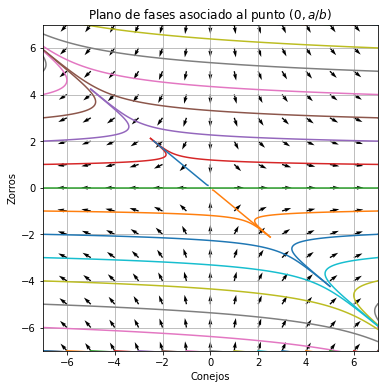

In [52]:
plt.figure(figsize=(6,6))
tiempo = np.linspace(0, 5, 100)

# Representamos varias soluciones del sistema
ic = np.linspace(-7, 7.0, 15)
for r in ic:
    X0 = [r, 7]
    Xs = scint.odeint(F1, X0, tiempo)
    plt.plot(Xs[:,0], Xs[:,1], "-")
for s in ic:
    X0 = [-7, s]
    Xs = scint.odeint(F1, X0, tiempo)
    plt.plot(Xs[:,0], Xs[:,1], "-")
for r in ic:
    X0 = [r, -7]
    Xs = scint.odeint(F1, X0, tiempo)
    plt.plot(Xs[:,0], Xs[:,1], "-")
for s in ic:
    X0 = [7, s]
    Xs = scint.odeint(F1, X0, tiempo)
    plt.plot(Xs[:,0], Xs[:,1], "-")
tempo = np.linspace(0, 20, 100)
X0 = [-.1, .1]
Xs = scint.odeint(F1, X0, tempo)
plt.plot(Xs[:,0], Xs[:,1], "-")
X0 = [.1, -.1]
Xs = scint.odeint(F1, X0, tempo)
plt.plot(Xs[:,0], Xs[:,1], "-")


pm = 15
X0, Y0 = np.meshgrid(np.linspace(-7, 7, pm),  np.linspace(-7, 7, pm))
U0 = a*X0
V0 = -d*Y0
modulo3 = U0**2 + V0**2
D1 = np.ones([pm, pm])
D2 = np.ones([pm, pm])
for i in range(pm):
    for j in range(pm):
        if modulo3[i, j] == 0:
            D1[i, j] = 0
            D2[i, j] = 0
        else:
            D1[i, j] = U0[i, j]/np.sqrt(modulo3[i, j])
            D2[i, j] = V0[i, j]/np.sqrt(modulo3[i, j])
plt.quiver(X0, Y0, D1, D2, angles = 'xy', scale = 35, headwidth = 3)
plt.xlabel("Conejos")
plt.ylabel("Zorros")
plt.xlim(-7,7)
plt.ylim(-7,7)
plt.title('Plano de fases asociado al punto $(0,a/b)$')
plt.grid(True)
plt.show()

#### Punto crítico ($\frac{d}{e},\frac{ae-bd}{ce}$)

In [21]:
C3 = C.subs({x:p3[0], y:p3[1]})
C3

⎡    2⋅b⋅d   a⋅e - b⋅d  -c⋅d ⎤
⎢a - ───── - ─────────  ─────⎥
⎢      e         e        e  ⎥
⎢                            ⎥
⎢      a⋅e - b⋅d             ⎥
⎢      ─────────          0  ⎥
⎣          c                 ⎦

In [22]:
det_C3 = sp.simplify(sp.det(C3))
det_C3

In [23]:
tr_C3 = sp.simplify(sp.trace(C3))
tr_C3

In [32]:
A3= (sp.simplify(tr_C3), sp.simplify(det_C3))
A3

In [24]:
C3.eigenvects()

⎡⎛              ___________________________     ⎡⎡                -2⋅c⋅d      
⎢⎜             ╱        2    2                  ⎢⎢────────────────────────────
⎢⎜  b⋅d   √d⋅╲╱  - 4⋅a⋅e  + b ⋅d + 4⋅b⋅d⋅e      ⎢⎢            ________________
⎢⎜- ─── - ─────────────────────────────────, 1, ⎢⎢           ╱        2    2  
⎢⎜  2⋅e                  2⋅e                    ⎢⎢b⋅d - √d⋅╲╱  - 4⋅a⋅e  + b ⋅d
⎢⎜                                              ⎢⎢                            
⎣⎝                                              ⎣⎣                   1        

           ⎤⎤⎞  ⎛              ___________________________     ⎡⎡             
───────────⎥⎥⎟  ⎜             ╱        2    2                  ⎢⎢─────────────
___________⎥⎥⎟  ⎜  b⋅d   √d⋅╲╱  - 4⋅a⋅e  + b ⋅d + 4⋅b⋅d⋅e      ⎢⎢            _
           ⎥⎥⎟, ⎜- ─── + ─────────────────────────────────, 1, ⎢⎢           ╱ 
 + 4⋅b⋅d⋅e ⎥⎥⎟  ⎜  2⋅e                  2⋅e                    ⎢⎢b⋅d + √d⋅╲╱  
           ⎥⎥⎟  ⎜                                  

El sistema linerarizado con los resultados de la matriz jacobiana:
$$\frac{du}{dt}= (a-\frac{2bd}{e}-\frac{ae-bd}{e})u - (\frac{cd}{e})v$$ 
$$\frac{dv}{dt}= \frac{ae-bd}{e}u  $$

Si hacemos un análisis cualitativo en función de la traza y del determinante, tenemos que la traza siempre va a ser negativa. Recurriendo al diagrama de los posibles estabilidades según el valor del determinante y de la traza (dipositiva 29 tema 4) nos queda que las posibles estabilidades dependen del valor del determinante.
Si atendemos al valor del determinante este nos da $\frac{d(ae-bd)}{e}$. 

Al igual que comentábamos en el punto de equilibrio anterior $(0,\frac{a}{b})$, la coordenada $y$ del tercer punto de equilibrio es $\frac{ae - bd}{ce}$ y debe estar en el primer cuadrante para que la solución tenga sentido biológico. Consecuentemente, $ae > bd$ (siempre va a ser positivo), por lo que la solución del determinante para que tenga sentido biológico siempre va a ser positiva.

Por esta razón, únicamente puede ser espiral estable o nodo propio o impropio sumidero. Esto va a depender de si $4det(A)>tr(A)^2$.
- Si $4det(A)>tr(A)^2$ tenemos una espiral sumidero.
- Si $4det(A)=tr(A)^2$ da nodo propio sumidero.
- Si $4det(A)<tr(A)^2$ tenemos parte real distinta para cada autovalor y en ese caso tendríamos un nodo impropio sumidero

### Conclusiones
El modelo con crecimiento logístico tiene 3 puntos críticos:
- El punto crítico trivial (0,0) con una estabilidad de punto de silla.
- El punto crítico (0,$\frac{a}{b}$) con una estabilidad de punto de silla.
- El punto crítico ($\frac{d}{e},\frac{ae-bd}{ce}$) con una estabilidad variable en función de el valor de $4det(A)=tr(A)^2$. Si $4det(A)>tr(A)^2$ tenemos una espiral sumidero, si $4det(A)=tr(A)^2$ da nodo propio sumidero y si $4det(A)<tr(A)^2$ tenemos parte real distinta para cada autovalor y en ese caso tendríamos un nodo impropio sumidero